## 2. Probability Distributions

In [188]:
using PyPlot
using Formatting
using Random
using Distributions
using LinearAlgebra
using Printf

Random.seed!(1234);

### 2.1 Binary Variables

In [29]:
ber = Bernoulli(0.25)
x = rand(ber, 1000)

ber_fit = fit(Bernoulli, x)

Bernoulli{Float64}(p=0.246)

#### 2.1.1. The beta distributions

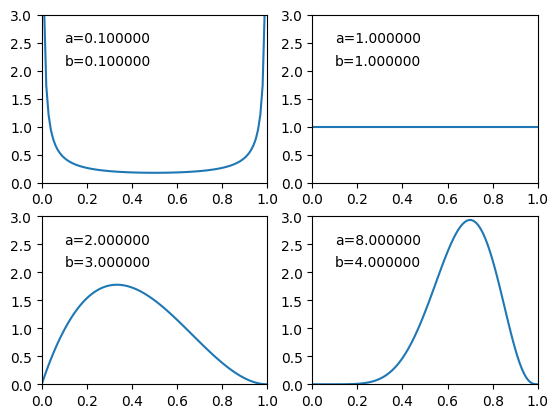

In [56]:
fig = figure()
x = range(0, stop=1, length=100)
for (i, (a, b)) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]])
    fignum = 220+i
    subplot(fignum)
    beta = Beta(a, b)
    PyPlot.xlim(0, 1)
    PyPlot.ylim(0, 3)
    PyPlot.plot(x, pdf.(beta, x))
    PyPlot.annotate(format("a={:f}", a), (0.1, 2.5))
    PyPlot.annotate(format("b={:f}", b), (0.1, 2.1))
end
PyPlot.show()

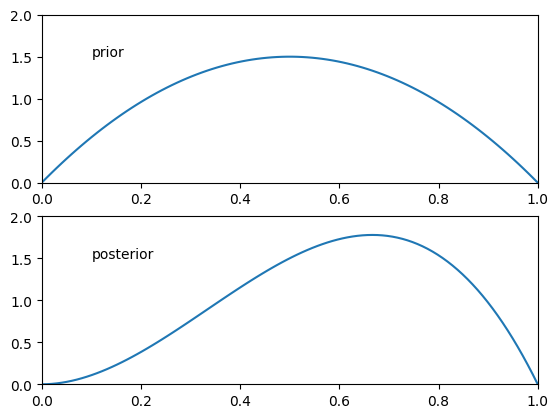

In [67]:
a = 2.0
b = 2.0
mu_prior = Beta(a, b)
xmu_prior = pdf.(mu_prior, x)

fig = figure()
PyPlot.subplot(211)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 2)
PyPlot.plot(x, xmu_prior)
PyPlot.annotate("prior", (0.1, 1.5))

function posterior_mu(X, a, b)
    
    N = length(X)
    a_ = a
    b_ = N + b
    for xn in X
        a_ = a_ + xn
        b_ = b_ - xn
    end
    
    mu = Beta(a_, b_)
    
    return mu
end

x_data = [1.0]
mu_posterior = posterior_mu(x_data, a, b)
xmu_posterior = pdf.(mu_posterior, x)
PyPlot.subplot(212)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 2)
PyPlot.plot(x, xmu_posterior)
PyPlot.annotate("posterior", (0.1, 1.5))

plt.show()

In [77]:
@printf "Maximum likelihood estimation \n"
bel_mle = fit_mle(Bernoulli, [1])
@printf "%d out of 10000 is 1 \n" sum(rand(bel_mle, 10000)) 

@printf "Bayesian estimation \n"
x_data = [1.0]
bel_bayese = posterior_mu(x_data, 1.0, 1.0)
@printf "%d out of 10000 is 1 \n" sum(rand(bel_bayese, 10000)) 

Maximum likelihood estimation 
10000 out of 10000 is 1 
Bayesian estimation 
6660 out of 10000 is 1 


## 2.2 Multinomial Variables

In [110]:
cat = Categorical([0.5, 0.25, 0.25])
x = rand(cat, 1000)

cat_fit = fit(Categorical, x)

DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}(support=Base.OneTo(3), p=[0.479, 0.257, 0.264])

### 2.2.1 The Dirichlet distribution

In [115]:
mu = Dirichlet(ones(3))
mu_data = rand(mu, 1)
println(mu_data)

cat = Categorical(reshape(mu_data, 3))
data = rand(cat, 100)

cat_fit = fit_mle(Categorical, data)
print(cat_fit)

[0.12117; 0.414798; 0.464032]
DiscreteNonParametric{Int64,Float64,Base.OneTo{Int64},Array{Float64,1}}(support=Base.OneTo(3), p=[0.09, 0.45, 0.46])

## 2. 3 The Gaussian Distribution

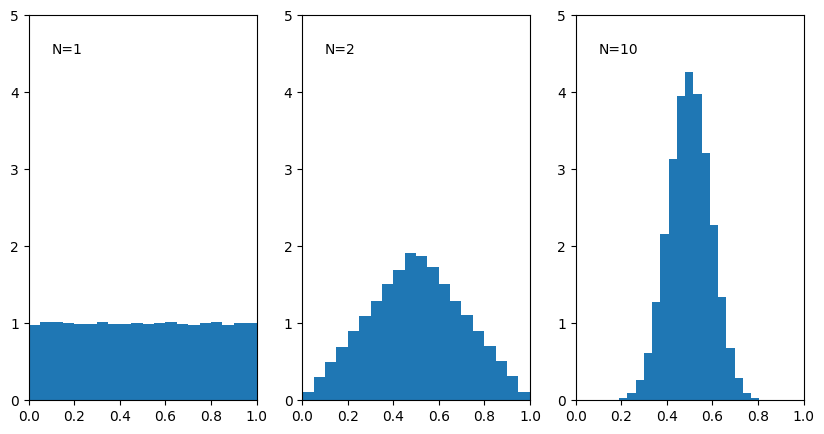

In [138]:
uniform = Uniform(0, 1)
fig = figure(figsize=(10, 5))

PyPlot.subplot(131)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 5)
PyPlot.annotate("N=1", (0.1, 4.5))
PyPlot.plt.hist(rand(uniform, 100000), normed=true, bins=20, alpha=1.0)

PyPlot.subplot(132)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 5)
PyPlot.annotate("N=2", (0.1, 4.5))
PyPlot.plt.hist(0.5 * ( rand(uniform, 100000) + rand(uniform, 100000) ), bins=20, normed=true)

PyPlot.subplot(133)
PyPlot.xlim(0, 1)
PyPlot.ylim(0, 5)
sample = zeros(100000)
for _ in 1:10
    sample = sample + rand(uniform, 100000)
end
PyPlot.annotate("N=10", (0.1, 4.5))
PyPlot.plt.hist(sample * 0.1, bins=20, normed=true)

PyPlot.show()

### 2.3.4 Maximum Likelihood for the Gaussian

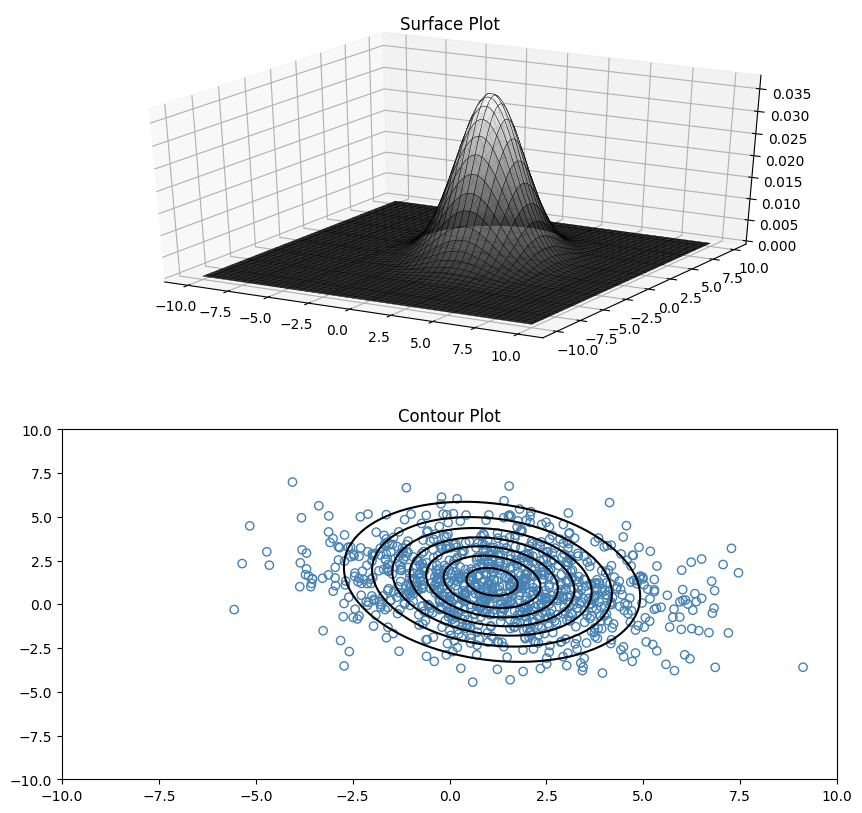

FullNormal(
dim: 2
μ: [1.28276, 1.09423]
Σ: [5.20363 -0.80336; -0.80336 3.63882]
)



In [210]:
X = rand(Normal(1.0, 2.0), (2, 100))

gaussian = fit(MvNormal, X)
println(gaussian)
data_gaussian = rand(gaussian, 1000)

n=100
x = range(-10, stop=10, length=n)
y = range(-10, stop=10, length=n)
xgrid = repeat(x', n, 1)
ygrid = repeat(y, 1, n)

z = zeros(n, n)
for i in 1:n
    for j in 1:n
        z[i:i, j:j] .= pdf(gaussian, [x[i]; y[j]])
    end
end

fig = figure("pyplot_surfaceplot", figsize=(10,10))
fig.add_subplot(2, 1, 1, projection="3d")
PyPlot.plot_surface(xgrid, ygrid, z, rstride=2, edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
PyPlot.title("Surface Plot")

fig.add_subplot(2, 1, 2)
PyPlot.scatter(data_gaussian[1, :], data_gaussian[2, :], facecolor="none", edgecolor="steelblue")
PyPlot.contour(xgrid, ygrid, z, colors="black", linewidth=2.0)
PyPlot.title("Contour Plot")
PyPlot.show()